# **Machine Learning**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

In [ ]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

### **Perform any data preparation on the dataset**

**Inspecting the data**

In [ ]:
# Show the columns of the dataframe
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

In [ ]:
# Show the head of the dataFrame 
houses.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25


In [ ]:
# Check info
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
## Some statistics on data 
houses.describe()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


In [ ]:
# Checking if there are any missing values in the dataset.
houses.isnull().sum()

median_house_value    0
median_income         0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
latitude              0
longitude             0
dtype: int64

We can see that nothing is missing from our dataset and we can proceed without further actions.

**Data Standardization before creating the actual models.**

In [ ]:
# Standardize training and test datasets

# Get all columns from the dataset
names = houses.columns

# Create the scaler object
scaler = StandardScaler()

# Fit the data on the scaler object
scaled_houses = scaler.fit_transform(houses)
scaled_houses = pd.DataFrame(scaled_houses, columns=names)
scaled_houses.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,2.129631,2.344766,0.982143,-0.804819,-0.970706,-0.974429,-0.977033,1.052548,-1.327835
1,1.314156,2.332238,-0.607019,2.045890,1.348649,0.861439,1.669961,1.043185,-1.322844
2,1.258693,1.782699,1.856182,-0.535746,-0.825895,-0.820777,-0.843637,1.038503,-1.332827
3,1.165100,0.932968,1.856182,-0.624215,-0.719067,-0.766028,-0.733781,1.038503,-1.337818
4,1.172900,-0.012881,1.856182,-0.462404,-0.612239,-0.759847,-0.629157,1.038503,-1.337818


**Removing outliers**

In [ ]:
# Removing outliers from the dataset
scaled_houses_clear = scaled_houses[(np.abs(stats.zscore(houses)) < 3).all(axis=1)]
scaled_houses_clear.shape

# Setting seaborn as a default
sns.set()

### **Split the data into samples and labels**

In [ ]:
X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
X=scaled_houses_clear[X_Features].values
Y=scaled_houses_clear['median_house_value'].values

print(scaled_houses_clear.shape)
print(X.shape)
print(Y.shape)

(19748, 9)
(19748, 8)
(19748,)


### **Split the data into training and testing data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(15798, 8) (15798,)
(3950, 8) (3950,)


## **Model 1 - Linear Regression**

In [ ]:
# Linear Regression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

linear_regression_predictions_train = model1.predict(x_train)
linear_regression_predictions_test = model1.predict(x_test)

### **Test the first model**

In [ ]:
# Model Testing
train_accuracy_linear = r2_score(y_train, linear_regression_predictions_train)
test_accuracy_linear = r2_score(y_test, linear_regression_predictions_test)
linear_mse = mean_squared_error(y_test , linear_regression_predictions_test)

### **Any other metrics or hyperparameters that can be looked at?**

In [ ]:
# The acrual values and the predicted ones
df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':linear_regression_predictions_test})
df_1.head()

,y_test,Y_pred
0,-0.368791,0.069116
1,-0.177271,0.001738
2,-1.298658,-0.960429
3,-1.083740,-1.024225
4,1.171166,0.884703


In [ ]:
# Final Metrics of the model1
train_accuracy_linear = r2_score(y_train, linear_regression_predictions_train)
test_accuracy_linear = r2_score(y_test, linear_regression_predictions_test)
linear_mse = mean_squared_error(y_test , linear_regression_predictions_test)

print('─' * 25)
print(f"Training Accuracy: {round((train_accuracy_linear * 100), 2)}%")
print(f"Test Accuracy: {round((test_accuracy_linear * 100), 2)}%")
print(f"MSE: {linear_mse}")
print('─' * 25)

─────────────────────────
Training Accuracy: 62.63%
Test Accuracy: 64.47%
MSE: 0.33578725071238463
─────────────────────────


## **Model 2 - Random Forest Regression (Ensemble Method)**

In [ ]:
# Random Forest Regression
model2 = RandomForestRegressor(n_estimators=50, max_depth= 20, random_state=1)
model2.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=50, random_state=1)

### **Test the second model**

In [ ]:
# Model Testing
random_forest_predictions_train = model2.predict(x_train)
random_forest_predictions_test = model2.predict(x_test)

train_accuracy_forest = r2_score(y_train, random_forest_predictions_train)
test_accuracy_forest = r2_score(y_test, random_forest_predictions_test)
forest_mse = mean_squared_error(y_test , random_forest_predictions_test)

print('─' * 25)
print(f"Training Accuracy: {round((train_accuracy_forest * 100), 2)}%")
print(f"Test Accuracy: {round((test_accuracy_forest * 100), 2)}%")
print(f"MSE: {forest_mse}")
print('─' * 25)

─────────────────────────
Training Accuracy: 96.89%
Test Accuracy: 80.84%
MSE: 0.1810450277527637
─────────────────────────


### **Any other metrics or hyperparameters that can be looked at?**

In [ ]:
# Performing hyperparameter tuning to improve model 3 using GridSearchCV.
number_of_folds = 5
random_state = 42 
parameters_to_tune = [{'n_estimators': [100,200,500],
                       'max_depth': [20,50,100]}]

search = GridSearchCV(RandomForestRegressor(random_state=random_state), parameters_to_tune, cv = number_of_folds)
search.fit(x_train, y_train)

print('Best Hyperparameters: %s' % search.best_params_)

Best Hyperparameters: {'max_depth': 50, 'n_estimators': 500}


In [ ]:
# Applying the best hyperparameters in order to improve model 2.
model2 = RandomForestRegressor(n_estimators = search.best_params_['n_estimators'],
                               max_depth = search.best_params_['max_depth'], random_state=random_state)
model2.fit(x_train, y_train)

# Testing the model again
random_forest_predictions_train = model2.predict(x_train)
random_forest_predictions_test = model2.predict(x_test)

train_accuracy_forest = r2_score(y_train, random_forest_predictions_train)
test_accuracy_forest = r2_score(y_test, random_forest_predictions_test)
forest_mse = mean_squared_error(y_test , random_forest_predictions_test)

In [ ]:
# The acrual values and the predicted ones
df_2 = pd.DataFrame({'y_test':y_test,'Y_pred':random_forest_predictions_test})
df_2.head()

,y_test,Y_pred
0,-0.368791,-0.137690
1,-0.177271,-0.027605
2,-1.298658,-1.221504
3,-1.083740,-1.020580
4,1.171166,0.867307


In [ ]:
# Final Metrics of the model2
print('─' * 25)
print(f"Training Accuracy: {round((train_accuracy_forest * 100), 2)}%")
print(f"Test Accuracy: {round((test_accuracy_forest * 100), 2)}%")
print(f"MSE: {forest_mse}")
print('─' * 25)

─────────────────────────
Training Accuracy: 97.28%
Test Accuracy: 81.23%
MSE: 0.17744127056981257
─────────────────────────


## **Model 3 - Support Vector Regression**

In [ ]:
# Support Vector Regression
model3 = SVR(kernel='linear', C = 1, epsilon=0.3) 
model3.fit(x_train,y_train)

SVR(C=1, epsilon=0.3, kernel='linear')

### **Test the third model**

In [ ]:
# Model Testing
support_vector_predictions_train = model3.predict(x_train)
support_vector_predictions_test = model3.predict(x_test)

train_accuracy_svr = r2_score(y_train, support_vector_predictions_train)
test_accuracy_svr = r2_score(y_test, support_vector_predictions_test)
svr_mse = mean_squared_error(y_test , support_vector_predictions_test)

print('─' * 25)
print(f"Training Accuracy: {round((train_accuracy_svr * 100), 2)}%")
print(f"Test Accuracy: {round((test_accuracy_svr * 100), 2)}%")
print(f"MSE: {svr_mse}")
print('─' * 25)

─────────────────────────
Training Accuracy: 62.01%
Test Accuracy: 63.59%
MSE: 0.3441360987138352
─────────────────────────


### **Any other metrics or hyperparameters that can be looked at?**

In [ ]:
# Performing hyperparameter tuning to improve model 3 using GridSearchCV method.
number_of_folds = 5

parameters_to_tune = [{'kernel': ('linear', 'rbf','poly'), 'C':[1, 1.5, 10],'epsilon':[0.1,0.3,0.5]}]

search = GridSearchCV(SVR(), parameters_to_tune, cv = number_of_folds)
search.fit(x_train, y_train)

print(f"Best Hyperparameters set found: {search.best_params_}")

Best Hyperparameters set found: {'C': 10, 'epsilon': 0.3, 'kernel': 'rbf'}


In [ ]:
# Applying the best hyperparameters in order to improve model 2.
model3 = SVR(kernel=search.best_params_['kernel'], epsilon = search.best_params_['epsilon'], C=search.best_params_['C'])
model3.fit(x_train, y_train)

# Testing the model again
support_vector_predictions_train = model3.predict(x_train)
support_vector_predictions_test = model3.predict(x_test)

train_accuracy_svr = r2_score(y_train, support_vector_predictions_train)
test_accuracy_svr = r2_score(y_test, support_vector_predictions_test)
svr_mse = mean_squared_error(y_test , support_vector_predictions_test)

In [ ]:
# The acrual values and the predicted ones
df_3 = pd.DataFrame({'y_test':y_test,'Y_pred':support_vector_predictions_test})
df_3.head()

,y_test,Y_pred
0,-0.368791,0.315919
1,-0.177271,-0.070775
2,-1.298658,-1.022704
3,-1.083740,-0.936520
4,1.171166,1.003140


In [ ]:
# Final Metrics of the model3
print('─' * 25)
print(f"Training Accuracy: {round((train_accuracy_svr * 100), 2)}%")
print(f"Test Accuracy: {round((test_accuracy_svr * 100), 2)}%")
print(f"MSE: {svr_mse}")
print('─' * 25)

─────────────────────────
Training Accuracy: 77.5%
Test Accuracy: 76.85%
MSE: 0.21878374008353413
─────────────────────────


## **Model 4 - Bagging meta-estimator (Ensemble Method)**

In [ ]:
# Bagging meta-estimator
model4 = BaggingRegressor(base_estimator=SVR(),random_state=0, max_samples= 1.0, max_features=1.0 )
model4.fit(x_train, y_train)

BaggingRegressor(base_estimator=SVR(), random_state=0)

### **Test the fourth model**

In [ ]:
# Model Testing
BaggingRegressor_predictions_train = model4.predict(x_train)
train_accuracy_bagging = r2_score(y_train, BaggingRegressor_predictions_train)

BaggingRegressor_predictions_test = model4.predict(x_test)
test_accuracy_bagging = r2_score(y_test, BaggingRegressor_predictions_test)

bagging_mse = mean_squared_error(y_test , BaggingRegressor_predictions_test)

print('─' * 25)
print(f"Training Accuracy: {round((train_accuracy_bagging * 100), 2)}%")
print(f"Test Accuracy: {round((test_accuracy_bagging * 100), 2)}%")
print(f"MSE: {bagging_mse}")
print('─' * 25)

─────────────────────────
Training Accuracy: 74.68%
Test Accuracy: 75.13%
MSE: 0.23502663467361606
─────────────────────────


### **Any other metrics or hyperparameters that can be looked at?**



In [ ]:
# Performing hyperparameter tuning to improve model 4 using GridSearchCV.
number_of_folds = 5

parameters_to_tune = [{'base_estimator': [DummyRegressor(),
                           DecisionTreeRegressor(),
                           SVR()],
                       'random_state': [1,5,8], 
                       'max_samples': [0.3, 0.5,1], 
                       'max_features': [0.3,0.5,1]}]

search = GridSearchCV(BaggingRegressor(), parameters_to_tune, cv = number_of_folds)
search.fit(x_train, y_train)

print(f"Best Hyperparameters set found: {search.best_params_}")

Best Hyperparameters set found: {'base_estimator': DecisionTreeRegressor(), 'max_features': 0.5, 'max_samples': 0.5, 'random_state': 1}


In [ ]:
# Applying the best hyperparameters in order to improve model 4.
model4 = BaggingRegressor(base_estimator = search.best_params_['base_estimator'],
                          random_state = search.best_params_['random_state'],
                          max_samples = search.best_params_['max_samples'],
                          max_features = search.best_params_['max_features'])
model4.fit(x_train, y_train)

# Testing the Model again
BaggingRegressor_predictions_train = model4.predict(x_train)
BaggingRegressor_predictions_test = model4.predict(x_test)

train_accuracy_bagging = r2_score(y_train, BaggingRegressor_predictions_train)
test_accuracy_bagging = r2_score(y_test, BaggingRegressor_predictions_test)
bagging_mse = mean_squared_error(y_test , BaggingRegressor_predictions_test)

In [ ]:
# The acrual values and the predicted ones
df_4 = pd.DataFrame({'y_test':y_test,'Y_pred':BaggingRegressor_predictions_test})
df_4.head()

,y_test,Y_pred
0,-0.368791,-0.035495
1,-0.177271,0.009482
2,-1.298658,-1.175254
3,-1.083740,-0.982607
4,1.171166,0.979561


In [ ]:
# Final Metrics of the model4
print('─' * 25)
print(f"Training Accuracy: {round((train_accuracy_bagging * 100), 2)}%")
print(f"Test Accuracy: {round((test_accuracy_bagging * 100), 2)}%")
print(f"MSE: {bagging_mse}")
print('─' * 25)

─────────────────────────
Training Accuracy: 89.41%
Test Accuracy: 77.05%
MSE: 0.2168874110863888
─────────────────────────


## **Comparing the 4 models**

In [ ]:
# Creating a table to compare all 4 models.

data = [["Linear Regression", test_accuracy_linear, train_accuracy_linear, linear_mse],["Random Forest", test_accuracy_forest, train_accuracy_forest, forest_mse],
        ["SVR", test_accuracy_svr, train_accuracy_svr, svr_mse],["Bagging meta", test_accuracy_bagging, train_accuracy_bagging, bagging_mse]]
#cols = ['Model','Test Accuracy', 'Train Accuracy', 'MSE']
#metrics_table = pd.DataFrame(data = data , columns=cols , index = models).sort_values(ascending=False , by=["Test Accuracy"])
# initialize list of lists
 
# Create the pandas DataFrame
metrics_table = pd.DataFrame(data, columns=['Model','Test Accuracy', 'Train Accuracy', 'MSE']).sort_values(ascending=False , by=["Test Accuracy"])
metrics_table

,Model,Test Accuracy,Train Accuracy,MSE
1,Random Forest,0.812258,0.972770,0.177441
3,Bagging meta,0.770523,0.894104,0.216887
2,SVR,0.768516,0.774988,0.218784
0,Linear Regression,0.644721,0.626320,0.335787


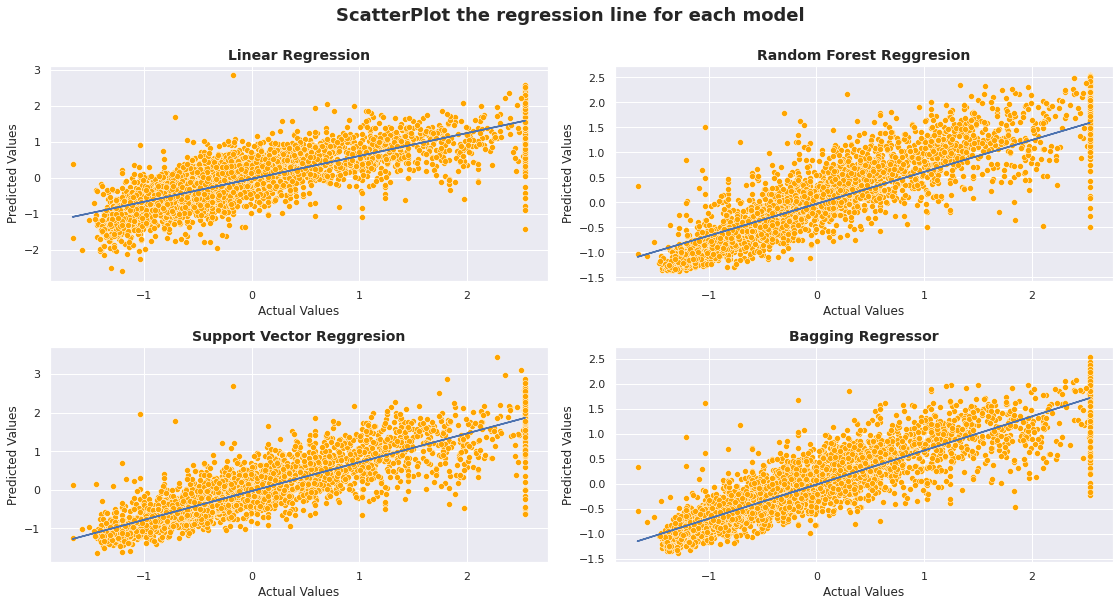

In [ ]:
# Figure to compare how data fit on the line for each model.
# ------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,8))

# Subplot for Support Vector Regression
sub3 = fig.add_subplot(223, sharex=None, sharey=None)
sub3 = sns.scatterplot(x=y_test, y=support_vector_predictions_test, color='orange')
gradient, intercept = np.polyfit(y_test, support_vector_predictions_test, 1)
sub3.plot(y_test, gradient*y_test + intercept)
plt.ylabel('Predicted Values', fontsize=12)
plt.xlabel('Actual Values', fontsize=12)
plt.title('Support Vector Reggresion', fontsize=14, fontweight='bold')

# ------------------------------------------------------------------------------

# Subplot for Bagging Regressor
sub4 = fig.add_subplot(224, sharex=None, sharey=None) 
sub4 = sns.scatterplot(x=y_test, y=BaggingRegressor_predictions_test, color='orange')
gradient, intercept = np.polyfit(y_test, BaggingRegressor_predictions_test, 1)
plt.plot(y_test, gradient*y_test + intercept)
plt.ylabel('Predicted Values', fontsize=12)
plt.xlabel('Actual Values', fontsize=12)
plt.title('Bagging Regressor', fontsize=14, fontweight='bold')

# ------------------------------------------------------------------------------

# Subplot for Linear Regression
sub1 = fig.add_subplot(221, sharex=None, sharey=None) 
sub1 = sns.scatterplot(x=y_test, y=linear_regression_predictions_test, color='orange')
gradient, intercept = np.polyfit(y_test, linear_regression_predictions_test, 1)
sub1.plot(y_test, gradient*y_test + intercept)
plt.ylabel('Predicted Values', fontsize=12)
plt.xlabel('Actual Values', fontsize=12)
plt.title('Linear Regression', fontsize=14, fontweight='bold')

# ------------------------------------------------------------------------------

# Subblot for Random Forest Regression
sub2 = fig.add_subplot(222, sharex=None, sharey=None) 
sub2 = sns.scatterplot(x=y_test, y=random_forest_predictions_test, color='orange')
gradient, intercept = np.polyfit(y_test, linear_regression_predictions_test, 1)
sub2.plot(y_test, gradient*y_test + intercept)
plt.ylabel('Predicted Values', fontsize=12)
plt.xlabel('Actual Values', fontsize=12)
plt.title('Random Forest Reggresion', fontsize=14, fontweight='bold')

# ------------------------------------------------------------------------------

fig.suptitle('ScatterPlot the regression line for each model', fontsize=18, y=1.05, fontweight='bold')
plt.subplots_adjust(top=0.4, bottom=0.1, left=0.2, right=0.55, hspace=0.5,
                    wspace=0.35)
plt.tight_layout()
plt.show()



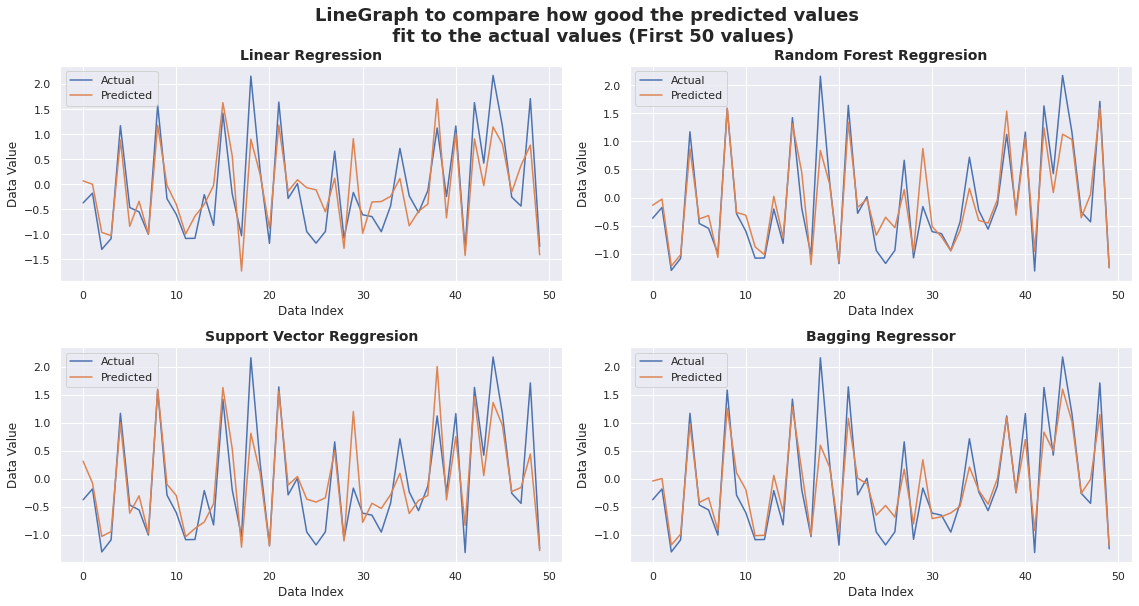

In [ ]:
# Figure to compare how the predicted values fit the actual values.
# ------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,8))

# Subplot for Support Vector Regression
sub1 = fig.add_subplot(223, sharex=None, sharey=None)
sub1.plot(df_3[:50])
sub1.legend(["Actual","Predicted"]);
plt.ylabel('Data Value', fontsize=12)
plt.xlabel('Data Index', fontsize=12)
plt.title('Support Vector Reggresion', fontsize=14, fontweight='bold')

# ------------------------------------------------------------------------------

# Subplot for Bagging Regressor
ax_2 = fig.add_subplot(224, sharex=None, sharey=None)
ax_2.plot(df_4[:50])
ax_2.legend(["Actual","Predicted"]);
plt.ylabel('Data Value', fontsize=12)
plt.xlabel('Data Index', fontsize=12)
plt.title('Bagging Regressor', fontsize=14, fontweight='bold')

# ------------------------------------------------------------------------------

# Subplot for Linear Regression
ax_2 = fig.add_subplot(221, sharex=None, sharey=None)
ax_2.plot(df_1[:50])
ax_2.legend(["Actual","Predicted"]);
plt.ylabel('Data Value', fontsize=12)
plt.xlabel('Data Index', fontsize=12)
plt.title('Linear Regression', fontsize=14, fontweight='bold')

# ------------------------------------------------------------------------------

# Subblot for Random Forest Regression
ax_2 = fig.add_subplot(222, sharex=None, sharey=None)
ax_2.plot(df_2[:50])
ax_2.legend(["Actual","Predicted"]);
plt.ylabel('Data Value', fontsize=12)
plt.xlabel('Data Index', fontsize=12)
plt.title('Random Forest Reggresion', fontsize=14, fontweight='bold')

# ------------------------------------------------------------------------------
fig.suptitle('LineGraph to compare how good the predicted values \n fit to the actual values (First 50 values)', y=1.05, fontsize=18, fontweight='bold')
plt.subplots_adjust(top=0.4, bottom=0.1, left=0.2, right=0.55, hspace=0.5,
                    wspace=0.35)
plt.tight_layout()
plt.show()

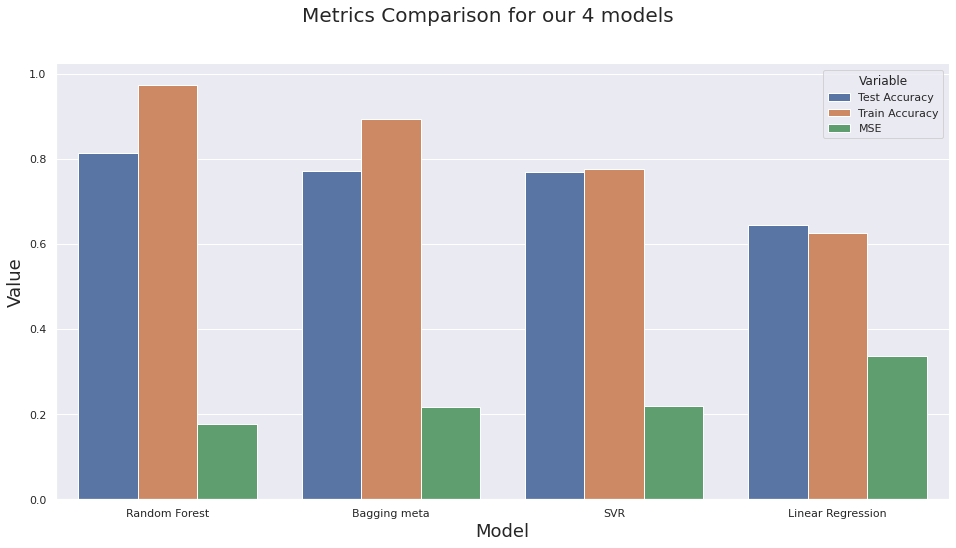

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 8))
tidy = metrics_table.melt(id_vars='Model').rename(columns=str.title)
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy, ax=ax1)
ax1.set_xlabel("Model", fontsize=18)
ax1.set_ylabel("Value", fontsize=18)
fig.suptitle('Metrics Comparison for our 4 models', fontsize=20)
sns.despine(fig)

# **Report**

Starting with the models, I chose to develop 4 regression models speaking of which: Linear Regression, Random Forest Regression, Support Vector Regression and an ensemble method called Bagging Regression. At first, I used the provided notebook as a starting point, and I improved it. The main purpose of this assignment was not only to create those models but also to improve them and to compare them as well. For the improving part, I have used a method called GridSearchCV which lies on the K-fold validation method and the main purpose of this method is to find the best combination of the given hyperparameters for each model in order to produce the best score. I have seen many examples of each model and I decided to use the most common hyperparameters for each machine-learning model. After the implementation of the best hyperparameters to my models the accuracy of the models has been improved and the Mean Square Error got smaller. With a significant improvement of 13.5%, the baggingRegressor is the most improved model. However, the best accuracy score belongs to the Random Forest model which ended up with an 81.23% score and MSE at 0.1774. Unfortunately, I could not improve the Linear Regression model as the outlier detection and removal had already been performed. Finally, plots were made to demonstrate how well each model performed and if the results coincided with the graphs. More specifically, I created a table with each model and its results in each of the metrics e.i test_accuracy, train_accuracy and mse. After this, I created a plot with 4 sub-scatterplots to demonstrate the regression line of each model. Furthermore, I have created another plot with 4 sub-line graphs to demonstrate how the fluctuation of the predicted data fits the fluctuation of the actual data. And finally. I have created a boxplot which illustrates the values of the metrics of each model. As it can be seen from the results Random Forest and Bagging Meta are overfitting the data but SVR and Linear Regression may have lower accuracy but they do not overfit the data.